Today Objectives..
<br>
<br>
1.Train_test_split<br>
2.r2-score,Linear Regression.


In [69]:
import pandas as pd
import numpy as np
import pyforest as ps


In [70]:
from sklearn import datasets

bost = datasets.load_boston()

In [71]:
#The datasets is in the Form of Dictionary.Like key value pair.

bost 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [72]:
data1 = bost.data

c1 = bost.feature_names

In [73]:
#Making Datafrmae.

df = pd.DataFrame(data1,columns=c1)

In [74]:
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94


In [75]:
#Here there is nO Target VArible .so,We have to set the Target .

df['Target']=bost.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
X = df.drop('Target',axis=1)

y = df[['Target']]

In [77]:
print(X.head(2))
y.head(2)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  
0     15.3  396.9   4.98  
1     17.8  396.9   9.14  


,Target
0,24.0
1,21.6


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
model = LinearRegression()

In [144]:
#Train the Data TO the Model.

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
#To find the Accuracy of the Model in r2_score

In [146]:
from sklearn.metrics import r2_score

In [147]:
y_pred = model.predict(X_test)

In [148]:
#Finding R2_score for Actual and predicted Values.

r2_score(y_test,y_pred)

0.7112260057484903

# Cross-Validation:

In [149]:
#To check the aaccuracy of the Model . We use this K-fold CrossValidation.

# Syntax:cross_val_score(modelname,parameters,no of folds(cv=n)).

In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
score=cross_val_score(model,X,y,cv=5) #cv=5 parts, model=LinearRegression()

In [152]:
score   #Here 0.71 is the Highest Accuracy.

array([-1.49490612e+04, -1.38779176e+01, -5.58394243e+01, -2.00261671e+01,
       -3.20931250e+00])

# Polynomial Regression

In [153]:
d={'empexp':[1,2,3,4,5,6,7,8,9,10],'sal':[4500,5000,6000,8000,11000,15000,20000,30000,50000,100000]}

In [154]:
#Converting Dictionary to DataFrame.

df = pd.DataFrame(d)

In [155]:
df.head()

,empexp,sal
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000


In [156]:
#first output from LinearRegression.

In [157]:
X=df[['empexp']]  #df.iloc[:,0:1]

y=df[['sal']]      #df.iloc[:,1]

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
model = LinearRegression()

In [160]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
print(model.coef_) #coeff of the LR

print(model.intercept_) #intercept of the LR

lin = model.predict(X)

[[8087.87878788]]
[-19533.33333333]


In [162]:
model.score(X,y)

0.6690412331929894

In [163]:
#Polynomial Regression is The Non-Linear Regression.

In [164]:
from sklearn.preprocessing import PolynomialFeatures

<u>Formula Polynomial Regression:</u> y =m1x1^2+m2x2^2....+c

In [165]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

p1_x = poly.fit_transform(X)

p1_x

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [166]:
#After poly ---->passed to Linear Regression.

from sklearn.linear_model import LinearRegression


In [167]:
model1 = LinearRegression()

In [168]:
model1.fit(p1_x,y) # Here p1_x ->Polynomial feture, y is the target.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
model1.score(p1_x,y)

0.9162082221443942

In [170]:
#visualization using LinearRegression

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

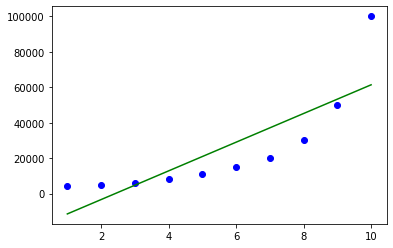

In [172]:
plt.scatter(X,y,color="Blue")
plt.plot(X,model.predict(X),color="Green") #For Linear Reg lin =model.predict(X)

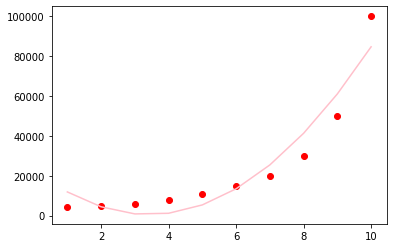

In [174]:
 #Visualizing the Data in Polynomial Regression
plt.scatter(X,y,color="Red")
plt.plot(X,model1.predict(p1_x),color="Pink")  #model1.predict(X)
    

In [176]:
#UnderFitting : The underfit means the the predicted line is far From the Actual values.

#Overfit : The Overfit means the Data is trained more with simple model.It causes the overfit.

In [177]:
from sklearn.metrics import mean_squared_error

In [178]:
mean_squared_error(X,y)

1428717138.5

# Missing Values:

In [179]:
import numpy as np
import pandas as pd

In [182]:
a = np.array([[1,2,np.nan,3,4],[np.nan,12,13,15,17],[np.nan,21,21,24,25],[30,32,35,42,np.nan],[30,32,35,42,47]])

In [184]:
a

array([[ 1.,  2., nan,  3.,  4.],
       [nan, 12., 13., 15., 17.],
       [nan, 21., 21., 24., 25.],
       [30., 32., 35., 42., nan],
       [30., 32., 35., 42., 47.]])

In [185]:
df = pd.DataFrame(a)

In [186]:
df

,0,1,2,3,4
0,1.0,2.0,NaN,3.0,4.0
1,NaN,12.0,13.0,15.0,17.0
2,NaN,21.0,21.0,24.0,25.0
3,30.0,32.0,35.0,42.0,NaN
4,30.0,32.0,35.0,42.0,47.0


In [189]:
df.isnull().sum()  #To get count of the Null values in the data.

0    2
1    0
2    1
3    0
4    1
dtype: int64

In [192]:
df.dropna() # It removes all the Data rows which have null value.

#Here dropna() removed all the rows of the data.

,0,1,2,3,4
4,30.0,32.0,35.0,42.0,47.0


# Simple Imputer

In [199]:
from sklearn.impute import SimpleImputer #It is used to fill data in the in the null values using ML

In [200]:
si = SimpleImputer(strategy='mean') #Imputer is used for null .And it fills the data with mean.

In [201]:
mydata = si.fit_transform(df)

In [202]:
mydata

array([[ 1.        ,  2.        , 26.        ,  3.        ,  4.        ],
       [20.33333333, 12.        , 13.        , 15.        , 17.        ],
       [20.33333333, 21.        , 21.        , 24.        , 25.        ],
       [30.        , 32.        , 35.        , 42.        , 23.25      ],
       [30.        , 32.        , 35.        , 42.        , 47.        ]])

In [203]:
df = pd.DataFrame(mydata)

In [207]:
df.isnull().sum() #By imputer  we filled . There is No NUll values.

0    0
1    0
2    0
3    0
4    0
dtype: int64

---------------*END OF THE REGRESSION*-----------------

CLASSIFICATION :According to the classes the Data is classified.

# KNN Algorithm with Iris Dataset.

In [211]:
from sklearn.datasets import load_iris

In [221]:
data1 = load_iris()

In [222]:
data1.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [223]:
print(data1['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [224]:
print(data1['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [225]:
import pandas as pd

In [227]:
iris_df  = pd.DataFrame(data1['data'])

iris_df.columns = data['feature_names']

iris_df['target'] =data['target']

In [231]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [232]:
print(iris_df.shape)
iris_df.isnull().sum() #checking the Null values in the Data.

(150, 5)


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [234]:
#Checking the Null values..
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [235]:
#identifying the Algorthm using data target values.

In [237]:
iris_df['target'].unique() #three targets have 0,1,2 typees of flowers in data.

array([0, 1, 2])

In [238]:
from sklearn.neighbors import KNeighborsClassifier

In [241]:
#creating the Object..

knn = KNeighborsClassifier(n_neighbors=5)

In [242]:
#Assigning vlaues to the X and Y values

In [246]:
columns = ['sepal length (cm)',
           'sepal width (cm)',
           'petal length (cm)',
           'petal width (cm)']
X = iris_df[columns]
X.shape


(150, 4)

In [247]:
y = iris_df['target']
y.shape


(150,)

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [254]:
print(X_train.shape) #training
print(X_test.shape)#Testing
print(y_train.shape)#Training
print(y_test.shape)#Testing


(105, 4)
(45, 4)
(105,)
(45,)


In [256]:
knn.fit(X_train,y_train)  #Training the model with the fit.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [263]:
knn.score(X_train,y_train)*100 #performance on the model after trianing dataset.

95.23809523809523

In [262]:
knn.score(X_test,y_test)*100

100.0

Dataset-2

In [362]:
from sklearn.datasets import load_breast_cancer

In [363]:
Task = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [365]:
df = Task.data
c1 = Task.feature_names

In [368]:
df = pd.DataFrame(df,columns=c1)

df['target']=Task.target

In [369]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [371]:
X = df.drop('target',axis=1)
y= df[['target']]

In [375]:
from sklearn.neighbors import KNeighborsClassifier

In [376]:
knn = KNeighborsClassifier()

In [377]:
from sklearn.model_selection import train_test_split

In [378]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [379]:
knn.fit(X_train,y_train)

C:\Users\NITHESH KUMAR\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [380]:
knn.score(X_train,y_train)

0.9221105527638191

In [381]:
y_pred = knn.predict(X_test)

In [382]:
knn.score(X_test,y_test)

0.9590643274853801